# Import Libraries

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection,metrics

# Change Directory

In [2]:
os.chdir('/home/kishlay/Documents/Data Analytics Practice Problems/Titanic')

# Load Data

In [3]:
train = pd.read_csv('train_p.csv')
test = pd.read_csv('test_p.csv')

In [4]:
train.head()

,Fare,PassengerId,Pclass,Survived,FamilySize,Child,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5
0,0.014151,1,3,0.0,1,0,0,1,0,0,1,0,0,1,0,0,0
1,0.139136,2,1,1.0,1,0,1,0,1,0,0,0,0,0,1,0,0
2,0.015469,3,3,1.0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,0.103644,4,1,1.0,1,0,1,0,0,0,1,0,0,0,1,0,0
4,0.015713,5,3,0.0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [5]:
#Set target, and predictor columns
target = 'Survived'
ID = ['PassengerId']
predictors = [x for x in train.columns if x not in [target]+ID]
#predictors.remove('Fare')
predictors

['Fare',
 'Pclass',
 'FamilySize',
 'Child',
 'Sex_0',
 'Sex_1',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Name_0',
 'Name_1',
 'Name_2',
 'Name_3',
 'Name_4',
 'Name_5']

In [6]:
train[target] = train[target].astype(int)

In [7]:
train.head()

,Fare,PassengerId,Pclass,Survived,FamilySize,Child,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5
0,0.014151,1,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0
1,0.139136,2,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0
2,0.015469,3,3,1,0,0,1,0,0,0,1,0,1,0,0,0,0
3,0.103644,4,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0
4,0.015713,5,3,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [8]:
plt.matshow(train[[target]+predictors].corr())

In [9]:
import seaborn as sns
corr = train[[target]+predictors].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [10]:
# predictors = ['Fare','Sex_0','Name_1','Name_2','Name_3','Embarked_C','Embarked_S']

# Create X,y and test datasets

In [11]:
X = train[predictors]
y = train[target]

In [12]:
X.head()

,Fare,Pclass,FamilySize,Child,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5
0,0.014151,3,1,0,0,1,0,0,1,0,0,1,0,0,0
1,0.139136,1,1,0,1,0,1,0,0,0,0,0,1,0,0
2,0.015469,3,0,0,1,0,0,0,1,0,1,0,0,0,0
3,0.103644,1,1,0,1,0,0,0,1,0,0,0,1,0,0
4,0.015713,3,0,0,0,1,0,0,1,0,0,1,0,0,0


In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
test.head()

,Fare,PassengerId,Pclass,FamilySize,Child,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5
0,0.015282,892,3,0,0,0,1,0,1,0,0,0,1,0,0,0
1,0.013663,893,3,1,0,1,0,0,0,1,0,0,0,1,0,0
2,0.018909,894,2,0,0,0,1,0,1,0,0,1,0,0,0,0
3,0.016908,895,3,0,0,0,1,0,0,1,0,0,0,1,0,0
4,0.023984,896,3,2,0,1,0,0,0,1,0,0,1,0,0,0


In [27]:
# Split the Data
X_train,X_cv,Y_train,Y_cv = model_selection.train_test_split(X[predictors],y,test_size=0.35,random_state=7) 

# Model 1 - Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
for i in [0.001,0.003,0.01,0.03,0.1,0.3,1,3,9,27]:
    lr = LogisticRegression(C=i)
    lr.fit(X_train,Y_train)
    ypred = lr.predict(X_cv)
    print("\n",i,"->",metrics.accuracy_score(Y_cv,ypred))
    


 0.001 -> 0.596153846154

 0.003 -> 0.685897435897

 0.01 -> 0.753205128205

 0.03 -> 0.75

 0.1 -> 0.75641025641

 0.3 -> 0.766025641026

 1 -> 0.769230769231

 3 -> 0.772435897436

 9 -> 0.772435897436

 27 -> 0.772435897436


In [18]:
# Fit the Model
lr = LogisticRegression(C=27)
lr.fit(X_train,Y_train)
ypred = lr.predict(X_cv)
print("\n",i,"->",metrics.accuracy_score(Y_cv,ypred))


 27 -> 0.772435897436


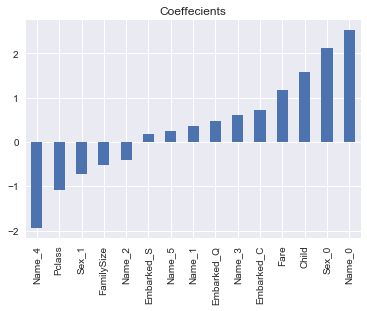

In [19]:
# Coeffecients Plot
%matplotlib inline
feature_importance = pd.Series(lr.coef_[0], predictors).sort_values()
feature_importance.plot(kind='bar', title='Coeffecients')

In [20]:
test[target] = lr.predict(test[predictors])
result = test[ID+[target]]
result.to_csv('logreg.csv',index=False)

# Model 2 - Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
for i in range(10,100,10):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,Y_train)
    ypred = rfc.predict(X_cv)
    print("\n",i,"->",metrics.accuracy_score(Y_cv,ypred))


 10 -> 0.753205128205

 20 -> 0.766025641026

 30 -> 0.782051282051

 40 -> 0.772435897436

 50 -> 0.762820512821

 60 -> 0.772435897436

 70 -> 0.775641025641

 80 -> 0.772435897436

 90 -> 0.772435897436


In [30]:
rfc = RandomForestClassifier(n_estimators=70)
rfc.fit(X_train,Y_train)
ypred = rfc.predict(X_cv)

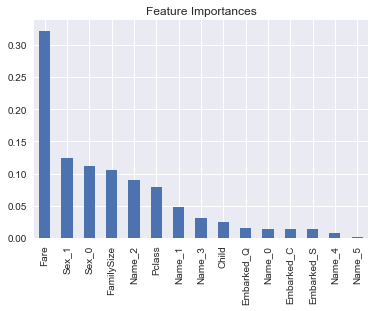

In [31]:
# Feature Importances Plot

feature_importance = pd.Series(rfc.feature_importances_, predictors).sort_values(ascending=False)
feature_importance.plot(kind='bar', title='Feature Importances')

In [33]:
# Predictions on the test set 
test[target] = rfc.predict(test[predictors])
result = test[ID+[target]]
result.to_csv('rfmodel.csv',index=False)

# Model 3 - Neural Networks

In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
for i in [0.001,0.003,0.01,0.03,0.1,0.3,1,3,9,27]:
    mlp = MLPClassifier(hidden_layer_sizes=(6),solver='lbfgs',alpha=i)
    mlp.fit(X_train,Y_train)
    ypred = mlp.predict(X_cv)
    print("\n",i,"->",metrics.accuracy_score(Y_cv,ypred))


 0.001 -> 0.761194029851

 0.003 -> 0.794776119403

 0.01 -> 0.783582089552

 0.03 -> 0.772388059701

 0.1 -> 0.776119402985

 0.3 -> 0.783582089552

 1 -> 0.772388059701

 3 -> 0.772388059701

 9 -> 0.768656716418

 27 -> 0.761194029851


In [36]:
# Fit the Model
mlp = MLPClassifier(hidden_layer_sizes=(6),solver='lbfgs',alpha=0.01)
mlp.fit(X_train,Y_train)
ypred = mlp.predict(X_cv)
print(metrics.accuracy_score(Y_cv,ypred))

0.791044776119


In [37]:
# Predict the test set
test[target] = mlp.predict(test[predictors])
result = test[ID+[target]]
result.to_csv('nn.csv',index=False)

# Model - 4 SVM

In [38]:
from sklearn import svm

In [45]:
for i in [0.001,0.003,0.01,0.03,0.1,0.3,1,3,9,27]:
    svmodel = svm.SVC(C=i,kernel='rbf')
    svmodel.fit(X_train,Y_train)
    ypred = svmodel.predict(X_cv)
    print("\n",i,"->",metrics.accuracy_score(ypred,Y_cv))



 0.001 -> 0.582089552239

 0.003 -> 0.582089552239

 0.01 -> 0.582089552239

 0.03 -> 0.738805970149

 0.1 -> 0.757462686567

 0.3 -> 0.764925373134

 1 -> 0.779850746269

 3 -> 0.779850746269

 9 -> 0.787313432836

 27 -> 0.779850746269


In [46]:
svmodel = svm.SVC(C=9)
svmodel.fit(X_train,Y_train)
test[target] = svmodel.predict(test[predictors])
result = test[ID+[target]]
result.to_csv('SVM.csv',index=False)

# Model 5 - ExtraTrees

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

In [52]:
for i in range(10,100,10):
    extc = ExtraTreesClassifier(n_estimators=i)
    extc.fit(X_train,Y_train)
    ypred = rfc.predict(X_cv)
    print("\n",i,"->",metrics.accuracy_score(Y_cv,ypred))


 10 -> 0.764925373134

 20 -> 0.764925373134

 30 -> 0.764925373134

 40 -> 0.764925373134

 50 -> 0.764925373134

 60 -> 0.764925373134

 70 -> 0.764925373134

 80 -> 0.764925373134

 90 -> 0.764925373134


In [53]:
extc = ExtraTreesClassifier()
extc.fit(X,y)
test[target] = extc.predict(test[predictors])
result = test[ID+[target]]
result.to_csv('extc.csv',index=False)